<a href="https://colab.research.google.com/github/gtseo0606/Learned/blob/main/MLP%20training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

data_description.txt  sample_data  sample_submission.csv  test.csv  train.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv("train.csv")

# Missing data

In [5]:
df_missing = df_train.isnull().sum()

In [6]:
df_missing = df_missing.sort_values(ascending=False)

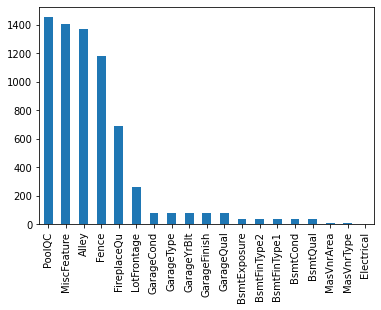

In [7]:
df_missing[df_missing > 0].plot.bar()

In [8]:
df_missing = df_missing[df_missing > 0]

In [9]:
len(df_missing)

19

In [10]:
#missing data가 있는 feature 삭제
df_train = df_train.drop(df_missing.index.tolist(), axis = 1)

In [11]:
df_train

Id  MSSubClass MSZoning  ...  SaleType SaleCondition SalePrice
0        1          60       RL  ...        WD        Normal    208500
1        2          20       RL  ...        WD        Normal    181500
2        3          60       RL  ...        WD        Normal    223500
3        4          70       RL  ...        WD       Abnorml    140000
4        5          60       RL  ...        WD        Normal    250000
...    ...         ...      ...  ...       ...           ...       ...
1455  1456          60       RL  ...        WD        Normal    175000
1456  1457          20       RL  ...        WD        Normal    210000
1457  1458          70       RL  ...        WD        Normal    266500
1458  1459          20       RL  ...        WD        Normal    142125
1459  1460          20       RL  ...        WD        Normal    147500

[1460 rows x 62 columns]

In [12]:
81 - len(df_missing)

62

In [13]:
len(df_train.columns)

62

In [14]:
#missing data 확인
df_train.isnull().sum().max()

0

In [15]:
numeric = [i for i in df_train.columns if df_train.dtypes[i] != 'object'] #숫자형
numeric.remove('Id')
numeric.remove('SalePrice')

categorical = [i for i in df_train.columns if df_train.dtypes[i] == 'object'] #분류형

# Categorical Data

In [16]:
df_order = pd.DataFrame()

In [17]:
feature_name = 'ExterQual' # 변수설정

In [18]:
df_order['val'] = df_train[feature_name].unique()

In [19]:
df_order

val
0  Gd
1  TA
2  Ex
3  Fa

In [20]:
df_order.index = df_order.val

In [21]:
df_order

val
val    
Gd   Gd
TA   TA
Ex   Ex
Fa   Fa

In [22]:
df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']

In [23]:
df_order = df_order.sort_values('mean_price')

In [24]:
df_order['rank'] = range(1, len(df_order) + 1)

In [25]:
df_order = df_order['rank'].to_dict()

In [26]:
df_train[feature_name + '_rank'] = df_train.apply(lambda row: df_order[row[feature_name]], axis=1)

In [27]:
df_train['test'] = 0

In [28]:
df_train

Id  MSSubClass MSZoning  ...  SalePrice ExterQual_rank test
0        1          60       RL  ...     208500              3    0
1        2          20       RL  ...     181500              2    0
2        3          60       RL  ...     223500              3    0
3        4          70       RL  ...     140000              2    0
4        5          60       RL  ...     250000              3    0
...    ...         ...      ...  ...        ...            ...  ...
1455  1456          60       RL  ...     175000              2    0
1456  1457          20       RL  ...     210000              2    0
1457  1458          70       RL  ...     266500              4    0
1458  1459          20       RL  ...     142125              2    0
1459  1460          20       RL  ...     147500              3    0

[1460 rows x 64 columns]

In [29]:
# 함수로 만들기

def add_rank_feature(feature_name, rank_feature_name):
  df_order = pd.DataFrame()
  df_order['val'] = df_train[feature_name].unique()
  df_order.index = df_order.val

  df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
  df_order['rank'] = range(1, len(df_order) + 1)
  df_order = df_order['rank'].to_dict()

  df_train[rank_feature_name] = df_train.apply(lambda row: df_order[row[feature_name]], axis=1)

In [30]:
rank_features = []
for feature_name in categorical:
  
  rank_feature_name = feature_name + '_rank'
  
  print(feature_name, '-->', rank_feature_name)

  add_rank_feature(feature_name, rank_feature_name)

  rank_features.append(rank_feature_name)

MSZoning --> MSZoning_rank
Street --> Street_rank
LotShape --> LotShape_rank
LandContour --> LandContour_rank
Utilities --> Utilities_rank
LotConfig --> LotConfig_rank
LandSlope --> LandSlope_rank
Neighborhood --> Neighborhood_rank
Condition1 --> Condition1_rank
Condition2 --> Condition2_rank
BldgType --> BldgType_rank
HouseStyle --> HouseStyle_rank
RoofStyle --> RoofStyle_rank
RoofMatl --> RoofMatl_rank
Exterior1st --> Exterior1st_rank
Exterior2nd --> Exterior2nd_rank
ExterQual --> ExterQual_rank
ExterCond --> ExterCond_rank
Foundation --> Foundation_rank
Heating --> Heating_rank
HeatingQC --> HeatingQC_rank
CentralAir --> CentralAir_rank
KitchenQual --> KitchenQual_rank
Functional --> Functional_rank
PavedDrive --> PavedDrive_rank
SaleType --> SaleType_rank
SaleCondition --> SaleCondition_rank


In [31]:
rank_features

['MSZoning_rank',
 'Street_rank',
 'LotShape_rank',
 'LandContour_rank',
 'Utilities_rank',
 'LotConfig_rank',
 'LandSlope_rank',
 'Neighborhood_rank',
 'Condition1_rank',
 'Condition2_rank',
 'BldgType_rank',
 'HouseStyle_rank',
 'RoofStyle_rank',
 'RoofMatl_rank',
 'Exterior1st_rank',
 'Exterior2nd_rank',
 'ExterQual_rank',
 'ExterCond_rank',
 'Foundation_rank',
 'Heating_rank',
 'HeatingQC_rank',
 'CentralAir_rank',
 'KitchenQual_rank',
 'Functional_rank',
 'PavedDrive_rank',
 'SaleType_rank',
 'SaleCondition_rank']

In [32]:
df_processed = df_train[rank_features + numeric]

In [33]:
df_processed

MSZoning_rank  Street_rank  LotShape_rank  ...  MiscVal  MoSold  YrSold
0                 1            1              1  ...        0       2    2008
1                 1            1              1  ...        0       5    2007
2                 1            1              2  ...        0       9    2008
3                 1            1              2  ...        0       2    2006
4                 1            1              2  ...        0      12    2008
...             ...          ...            ...  ...      ...     ...     ...
1455              1            1              1  ...        0       8    2007
1456              1            1              1  ...        0       2    2010
1457              1            1              1  ...     2500       5    2010
1458              1            1              1  ...        0       4    2010
1459              1            1              1  ...        0       6    2008

[1460 rows x 60 columns]

In [34]:
df_processed['SalePrice'] = df_train['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_processed

MSZoning_rank  Street_rank  LotShape_rank  ...  MoSold  YrSold  SalePrice
0                 1            1              1  ...       2    2008     208500
1                 1            1              1  ...       5    2007     181500
2                 1            1              2  ...       9    2008     223500
3                 1            1              2  ...       2    2006     140000
4                 1            1              2  ...      12    2008     250000
...             ...          ...            ...  ...     ...     ...        ...
1455              1            1              1  ...       8    2007     175000
1456              1            1              1  ...       2    2010     210000
1457              1            1              1  ...       5    2010     266500
1458              1            1              1  ...       4    2010     142125
1459              1            1              1  ...       6    2008     147500

[1460 rows x 61 columns]

In [36]:
corrmat = df_processed.corr()

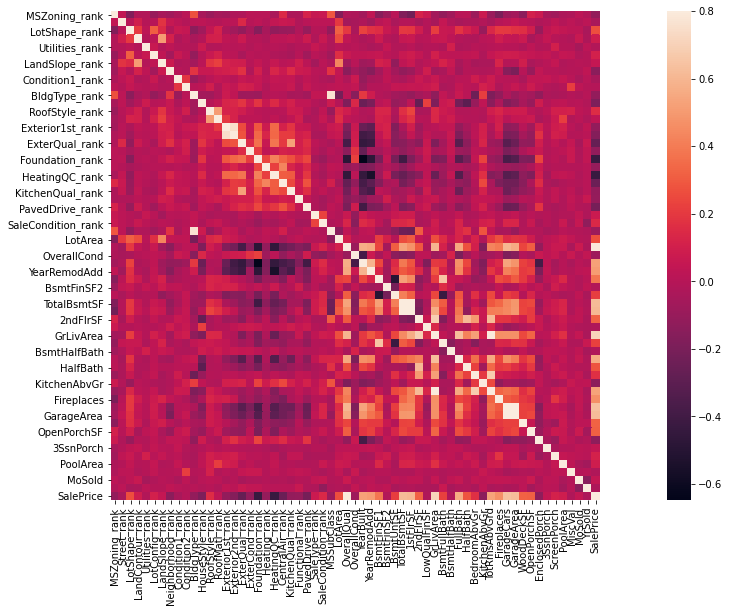

In [37]:
f, ax = plt.subplots(figsize = (24,9))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [38]:
df_feature = corrmat.sort_values(by=['SalePrice'])['SalePrice']

In [39]:
df_feature[-40:]

YrSold               -0.028923
LowQualFinSF         -0.025606
MiscVal              -0.021190
BsmtHalfBath         -0.016844
Utilities_rank       -0.014314
BsmtFinSF2           -0.011378
Condition2_rank      -0.004833
RoofMatl_rank         0.035820
3SsnPorch             0.044584
MoSold                0.046432
LandSlope_rank        0.051152
SaleType_rank         0.072896
LandContour_rank      0.092009
PoolArea              0.092404
LotConfig_rank        0.109106
ScreenPorch           0.111447
SaleCondition_rank    0.142503
RoofStyle_rank        0.159332
BedroomAbvGr          0.168213
BsmtUnfSF             0.214479
BsmtFullBath          0.227122
LotArea               0.263843
LotShape_rank         0.267759
HalfBath              0.284108
OpenPorchSF           0.315856
2ndFlrSF              0.319334
WoodDeckSF            0.324413
BsmtFinSF1            0.386420
Fireplaces            0.466929
YearRemodAdd          0.507101
YearBuilt             0.522897
TotRmsAbvGrd          0.533723
FullBath

TODO
 1. 전처리 된 dataset으로 regression
 2. Change distribution of the label

# Train Test split

In [40]:
df_train

Id  MSSubClass  ... SaleType_rank  SaleCondition_rank
0        1          60  ...             1                   1
1        2          20  ...             1                   1
2        3          60  ...             1                   1
3        4          70  ...             1                   2
4        5          60  ...             1                   1
...    ...         ...  ...           ...                 ...
1455  1456          60  ...             1                   1
1456  1457          20  ...             1                   1
1457  1458          70  ...             1                   1
1458  1459          20  ...             1                   1
1459  1460          20  ...             1                   1

[1460 rows x 90 columns]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_feature[-16:-1].index.tolist()

['OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [43]:
X = df_processed[df_feature[-16:-1].index.tolist()]
y = df_processed['SalePrice']

In [44]:
X.shape, y.shape

((1460, 15), (1460,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [46]:
X_train.shape, X_test.shape

((1314, 15), (146, 15))

In [47]:
from sklearn.linear_model import Lasso

In [48]:
model = Lasso()

In [49]:
model = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809534762218.5767, tolerance: 787334624.1028306
  positive)


In [50]:
pred = model.predict(X_test)

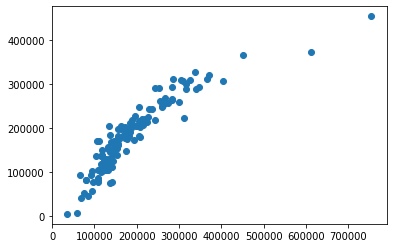

In [51]:
plt.scatter(y_test, pred)

In [52]:
from sklearn import metrics

In [53]:
def print_evaluate(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  
  print('MAE : ', mae)
  print('MSE : ', mse)
  print('RMSE : ', rmse)
  print('R2 Square : ', r2_square)

In [54]:
print_evaluate(y_test, pred)

MAE :  23794.14269597338
MSE :  1754358902.586029
RMSE :  41885.06777583186
R2 Square :  0.80798642166732


In [55]:
df_results = pd.concat([y_test.reset_index(), pd.DataFrame(pred)], axis=1)

In [56]:
df_results

index  SalePrice              0
0      892     154500  155918.012756
1     1105     325000  308343.211554
2      413     115000  109925.280172
3      522     159000  176015.061794
4     1036     315500  299781.721455
..     ...        ...            ...
141    526     132000  119118.906907
142    101     178000  185965.751837
143   1092     136500  183903.421321
144    411     145000  140071.706967
145   1392     123000  127179.567816

[146 rows x 3 columns]

# Label transformation

In [57]:
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


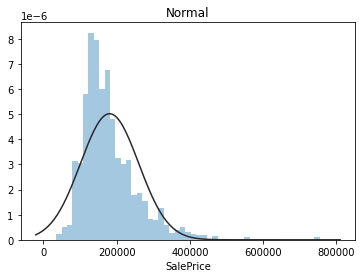

In [58]:
plt.figure(2); plt.title('Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


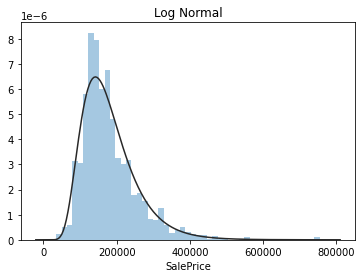

In [59]:
plt.figure(3); plt.title('Log Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.lognorm)

In [60]:
model = Lasso()
model = model.fit(X_train, np.log(y_train))

In [61]:
pred = np.exp(model.predict(X_test))

In [62]:
print_evaluate(y_test, pred)

MAE :  21617.328358371098
MSE :  1345501205.1928196
RMSE :  36681.07420990857
R2 Square :  0.8527356627659387


# MLP

# Data Preprocessing

In [63]:
df_processed

MSZoning_rank  Street_rank  LotShape_rank  ...  MoSold  YrSold  SalePrice
0                 1            1              1  ...       2    2008     208500
1                 1            1              1  ...       5    2007     181500
2                 1            1              2  ...       9    2008     223500
3                 1            1              2  ...       2    2006     140000
4                 1            1              2  ...      12    2008     250000
...             ...          ...            ...  ...     ...     ...        ...
1455              1            1              1  ...       8    2007     175000
1456              1            1              1  ...       2    2010     210000
1457              1            1              1  ...       5    2010     266500
1458              1            1              1  ...       4    2010     142125
1459              1            1              1  ...       6    2008     147500

[1460 rows x 61 columns]

In [64]:
X = df_processed[df_feature[-31:-1].index.tolist()]
y = df_processed['SalePrice']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
min_max_scaler = MinMaxScaler()

In [68]:
X_train.shape

(1314, 30)

In [69]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [70]:
scaled_X_train = min_max_scaler.transform(X_train)

In [71]:
scaled_X_test = min_max_scaler.transform(X_test)

# y값 Scaling

In [72]:
y_min_max_scaler = MinMaxScaler()

In [73]:
y_train.shape

(1314,)

In [74]:
y_min_max_scaler.fit(np.array(y_train).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
scaled_y_train = y_min_max_scaler.transform(np.array(y_train).reshape(-1, 1))

In [76]:
scaled_y_test = y_min_max_scaler.transform(np.array(y_test).reshape(-1, 1))

In [77]:
scaled_y_train.shape, scaled_y_test.shape

((1314, 1), (146, 1))

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [79]:
model = keras.Sequential(
    [
      keras.Input(shape=X_train.shape[-1]),
      layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(1.0))
    ]
)

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss="mse", optimizer="adam")

In [82]:
model.fit(scaled_X_train, scaled_y_train, batch_size=1, epochs=100)

Epoch 1/100
1314/1314 [==============================] - 5s 2ms/step - loss: 0.7945
Epoch 2/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0157
Epoch 3/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0157
Epoch 4/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0157
Epoch 5/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0157
Epoch 6/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 7/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 8/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 9/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 10/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0157
Epoch 11/100
1314/1314 [==============================] - 2s 2ms/step - loss: 0.0156
Epoch 12/100
1314/1314 [==============================] - 2s 2ms/step - lo

In [83]:
scaled_pred = model.predict(scaled_X_test)

In [84]:
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [85]:
print_evaluate(y_test, pred_y)

MAE :  67795.41331335617
MSE :  9146929069.870193
RMSE :  95639.57899253945
R2 Square :  -0.0011261543302489851


# Add layers

In [86]:
model = keras.Sequential(
    [
      keras.Input(shape=scaled_X_train.shape[-1]),
      layers.Dense(96, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1),
     
    ]
)

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 96)                2976      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 49        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss="mse", optimizer="adam")

In [89]:
model.fit(scaled_X_train, scaled_y_train, batch_size=2, epochs=100, validation_split=0.1)

Epoch 1/100
591/591 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 2/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 3/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 4/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 5/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 6/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 7/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 8/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 10/100
591/591 [==============================] - 1s 2ms/step - loss: 0.0022 - val_lo

In [90]:
scaled_pred = model.predict(scaled_X_test)
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [91]:
print_evaluate(y_test, pred_y)

MAE :  20262.662109375
MSE :  1128715440.2539895
RMSE :  33596.36052095509
R2 Square :  0.8764627407293664


# Early-stopping

In [92]:
model = keras.Sequential(
    [
      keras.Input(shape=scaled_X_train.shape[-1]),
      layers.Dense(96, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1),
     
    ]
)

In [93]:
model.compile(loss="mse", optimizer="adam")

In [94]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [95]:
model.fit(scaled_X_train, scaled_y_train, batch_size=2, epochs=150, callbacks=[early_stopping_callback])

Epoch 1/150
657/657 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 2/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 3/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 4/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 5/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 6/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 7/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 8/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 9/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 10/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 11/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 12/150
657/657 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 13/150
